# Machine Learning:

## Introduction and Applications:
<pre>
Machine Learning is the driving force behind lot of applications that we have just taken for granted. We are using all the below features, without realizing that these features are the applications of Machine Learning.<br>
1. <span style="color:blue">Virtual assistants</span> -  like Apple's Siri, Amazon's Alexa, Google's Now, Microsoft's Cortona, ... assist by finding the information when asked over voice.
2. <span style="color:blue">Traffic predictions while commuting</span> - like Google Maps, Online transportation networks like OLA, UBER, ...
3. <span style="color:blue">Videos surveillance</span> - Now a days video surveillance systems are powred by AI, that makes it possible to detect the crimes before they happen.
4. <span style="color:blue">Social Media Services</span> - from personalizing news feed to better adds targeting (people you may know, face recognition)
5. <span style="color:blue">Email spam or ham</span>
6. <span style="color:blue">Online customer support using chatbox</span>
7. <span style="color:blue">Product recommendations</span>
</pre>

## What is ML:
<pre>
Machine Learning is a computer program or system that can learn how to perform a task based on the experince. As the experience increases the performance of the task should also increase. In case of ML, experience is data.

<span style="color:blue">Formal Definition:</span>
A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.
</pre>

## When to use ML:
* difficult for humans to express rules
* large amount of historical data available
* patterns or relationships are dynamic
<pre>
<span style="color:blue">1. Rule based approach</span> 
   Contains set of rules.
   Rules are static.
   Rules don't change rapidly, they change slowly over time based on new research by a human analyst.

   Eg: Commute time calculation:
       IF(day=monday, time=10:00, distance=4km), THEN commute_time = 40 Mins
<span style="color:blue">2. ML based approach</span>
   Collects large amount of data.
   Uses an algorithm to find the relation between the data and commute time.
   Updates the relationship continuosly with new data.
</pre>

## Types of ML:
* **Supervised Learning**
* **Unsupervised Learning**
* **Semi-supervised Learning**
* **Reinforment Learning**

# Data preprocessing:

## Types of variables:

    1. Categorical
    2. Numeric

<br>


**1. Categorical (Qualitative)** - describes quality or characteristic of a data unit
* **Nominal** - Can not be ordered<br>
**Eg:**
    1. Male, Female - gender cannot be ordered
    2. Red, Blue, Green - color cannot be ordered


* **Ordinal**  - Can be ordered<br>
**Eg:**
    1. small, medium, large - sizes can be ordered
    2. A, B, C - grades can be ordered

<br>

**2. Numeric**
* **Discrete** - Data that has distinguishable spaces between the values<br>
**Eg:** 1, 2, 3, ..


* **Continuous** - Values that fall on a continuum, which has infinite no. of possible values with in the selected range<br>
**Eg:** 1.0123, 2.456, ...

## importing the dataset:
* Distinguish dependent variables and independent variables.
* Use independent variables to predict dependent variables.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing dataset
dataset = pd.read_csv("datasets/Data.csv")
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [2]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values

## handling missing values:
* We should not remove any row because of any column is missing.
* One way to handle this problem is to take the mean in place of missing values

In [3]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
X[:,1:3] = imputer.fit_transform(X[:,1:3])

C:\Learnings\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## handling categorical_features:
* Since ML algorithms are good with numerics, all the mathematical equations should be represented in numbers.
* We need to encode the text into numbers.

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])

In [5]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder_X = OneHotEncoder(categorical_features=[0])
X = onehotencoder_X.fit_transform(X).toarray()

C:\Learnings\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Learnings\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [6]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

## Splitting the data:
* Given dataset should be split into training and test datasets. 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## feature scaling:
* Lot of ML algorithms are based on euclidian distance.
<img src="images/data_preprocessing_1.png" width="600" height="600" align="center"/>
* If the dependent variable values are not in the same scale, the higher value will dominate the lower value(lower value may become negligible).
* feature scaling csn be done using standardization or normalization.
<img src="images/data_preprocessing_2.png" width="600" height="600" align="center"/>
$$SD = \sqrt{\sum_{i=1}^N \frac{(x_i-mean)^2}{N}}$$

In [8]:
from sklearn.preprocessing import StandardScaler
SC_X = StandardScaler()
X_train = SC_X.fit_transform(X_train)
X_test = SC_X.transform(X_test)

## Regression:
    Regression analysis is a statistical process for estimating the relation among variables. i.e. the relation between dependent variable and one or more independent variables.
<br>

* **Simple linear regression**
<img src="images/simple_linear_regression_1.png" width="600" height="600" align="center"/>
<img src="images/simple_linear_regression_2.png" width="600" height="600" align="center"/>

<br>

* Best fitting line can be found using Ordinary Least Squares method.

<br>

* **Multiple linear regression**
<img src="images/multiple_linear_regression_1.png" width="500" height="500" align="center"/>

<br>



In [54]:
#simple linear regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("datasets/simple_linear_regression_1.csv")
dataset = pd.read_csv("datasets/simple_linear_regression_1.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting the salaries
y_pred = regressor.predict(X_test)

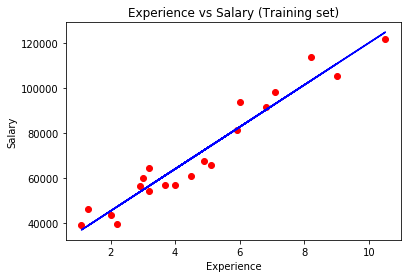

In [61]:
#visualising the training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Experience vs Salary (Training set)")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

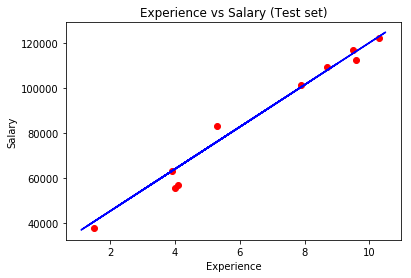

In [65]:
#visualising the test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Experience vs Salary (Test set)")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [66]:
regressor.score(X_train, y_train)

0.9381900012894278